In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


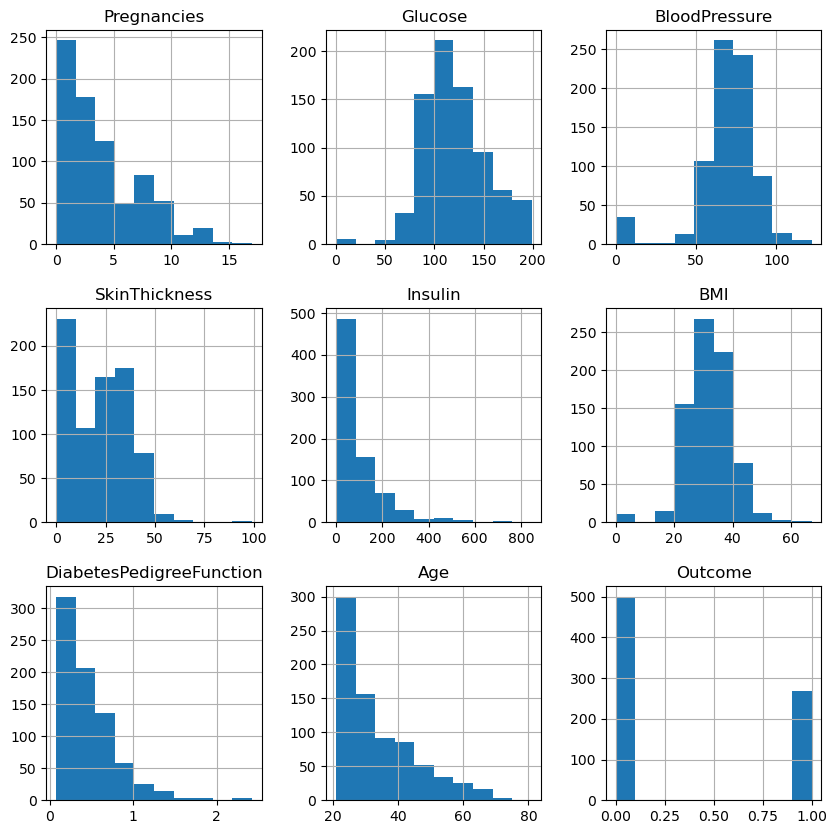

In [7]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
columns1 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in columns1:
    zero_count = df[df[feature]==0][feature].count()
    print('{0} : {1}'.format(feature, zero_count))

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


In [10]:
#Replacing Zero values with imputation methods

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

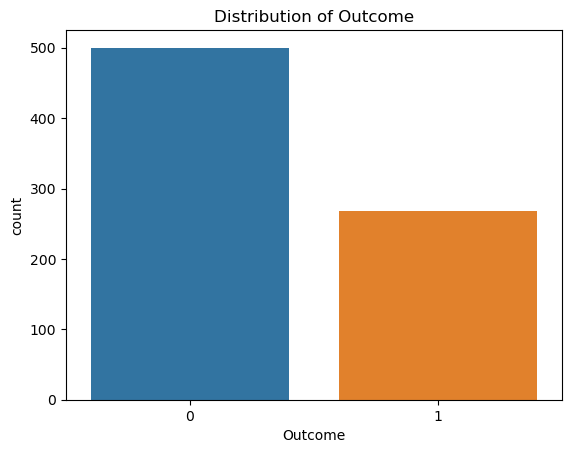

In [11]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

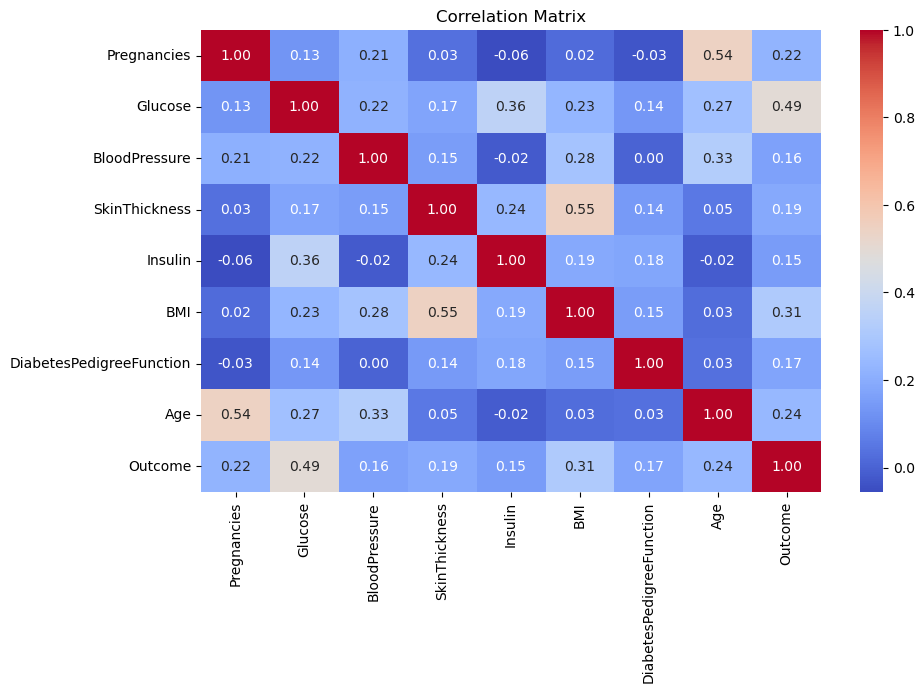

In [12]:
#Correlation Matrix

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

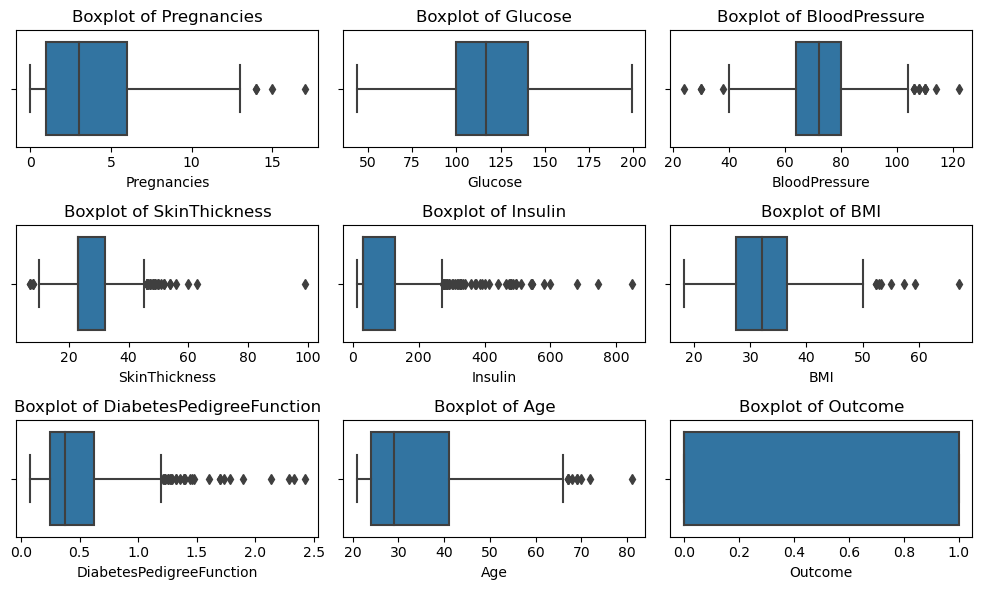

In [13]:
#Boxplot

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [14]:
#Outlier Handling using Zscore

from scipy.stats import zscore

def handle_outliers(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    
    data.loc[outliers, column] = data[column].median()
    return data

numerical_columns = df.loc[:, df.columns!= 'Outcome'].columns.to_list()
for column in numerical_columns:
    df = handle_outliers(df, column)

In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [18]:
X_test.shape, y_test.shape

((154, 8), (154,))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1 Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score,confusion_matrix

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print('Accuracy for Logistic Regression {} %'.format(accuracy*100))
print(f"\nLinear Regression\nMAE : {mae_lr}\nMSE: {mse_lr}\nRsquared {r2_lr}")
print(f"Linear Regression Confusion Matrx \n{conf_mat}")

Accuracy for Logistic Regression 77.27272727272727 %

Linear Regression
MAE : 0.22727272727272727
MSE: 0.22727272727272727
Rsquared 0.010101010101009833
Linear Regression Confusion Matrx 
[[82 17]
 [18 37]]


SVM Model

In [21]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy {} %".format(accuracy_svm*100))

SVM Accuracy 75.97402597402598 %


KNN model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(k):
    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred_knn = knn_model.predict(X_test)

    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print("KNN Accuracy: {0} for K = {1}".format(accuracy_knn*100, k))
    

In [23]:
k_values = np.arange(1, 16)

for k in k_values:
    KNN(k)

KNN Accuracy: 64.28571428571429 for K = 1
KNN Accuracy: 65.5844155844156 for K = 2
KNN Accuracy: 68.83116883116884 for K = 3
KNN Accuracy: 63.63636363636363 for K = 4
KNN Accuracy: 69.48051948051948 for K = 5
KNN Accuracy: 69.48051948051948 for K = 6
KNN Accuracy: 68.18181818181817 for K = 7
KNN Accuracy: 72.07792207792207 for K = 8
KNN Accuracy: 72.07792207792207 for K = 9
KNN Accuracy: 72.72727272727273 for K = 10
KNN Accuracy: 74.67532467532467 for K = 11
KNN Accuracy: 74.02597402597402 for K = 12
KNN Accuracy: 74.67532467532467 for K = 13
KNN Accuracy: 75.32467532467533 for K = 14
KNN Accuracy: 75.32467532467533 for K = 15


In [24]:
KNN(15)

KNN Accuracy: 75.32467532467533 for K = 15
